# Week 3 - Univariate Analysis

## Please run the cells of the notebook as you get to them while reading

In [284]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns



# 1. Lesson: Bar charts and univariate graphs

Let's make a dataset (in this case, just a series) which is weighted to have more small values than large values.  By squaring a random number between 0 and 1, we ensure that half (those whose initial value is below 0.5) are below 0.25, while the other half are between 0.25 and 1.  This means that most of the values are small, and it's more interesting than analyzing a perfectly uniform dataset.  This kind of trick - transforming one random variable to get another - can generate a variety of random datasets for you.  We then multiply by 100 to get a number between 0 and 100.

In [285]:
np.random.seed(0)
lesson_series = np.round(np.random.random(size = 1000)**2 * 100, 2)
lesson_series[0:10] # check the first ten values.  Are they mostly on the small side?

array([30.12, 51.15, 36.33, 29.69, 17.95, 41.72, 19.15, 79.53, 92.86,
       14.7 ])

In [286]:
import seaborn as sns

In the plot below, you can see a histogram of the values in the series.  For some reason, it decided to have exactly 11 bins (we allowed it to choose the number of bins.)  Most values - about 300 of them - are between 0 and 9, and the next most likely bin is between 9 and 18.  Since there are 1000 values, the total of the bars should be 1000.

<Axes: ylabel='Count'>

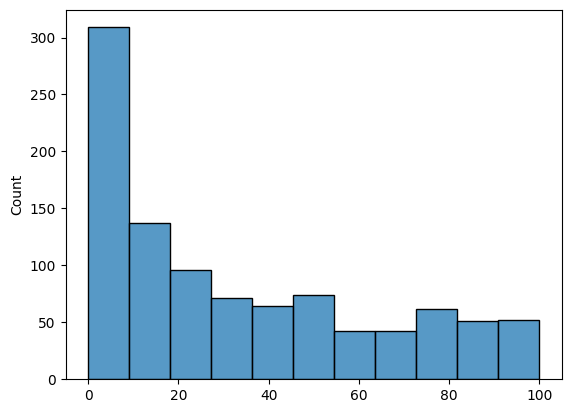

In [287]:
sns.histplot(lesson_series)

There are 11 bins or bars, a number which by default is chosen by seaborn.  We can reproduce this manually to (hopefully) see the same values as numbers. I'm not sure that this second histogram is guaranteed to be exactly the same, but it looks the same to me:

In [288]:
np.histogram(lesson_series, bins = 11)[0]

array([309, 137,  96,  71,  64,  74,  42,  42,  62,  51,  52])

What happens if we override seaborn and choose the number of bins ourselves?  We could choose a much larger number of bins:

<Axes: ylabel='Count'>

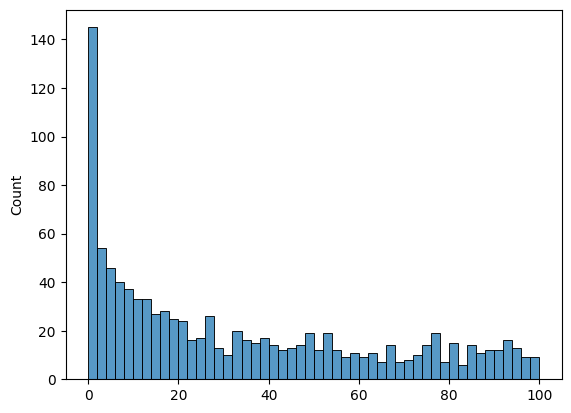

In [289]:
sns.histplot(lesson_series, bins = 50)

One disadvantage of this 50 bin picture is that the outliers are worse.  That is, the graph wobbles up and down a bit more randomly.  That's because there are fewer values in each bin, so there's more of a role for chance to take effect.  If we had many more data points and/or fewer bins, we could get rid of this wobble.

<Axes: ylabel='Count'>

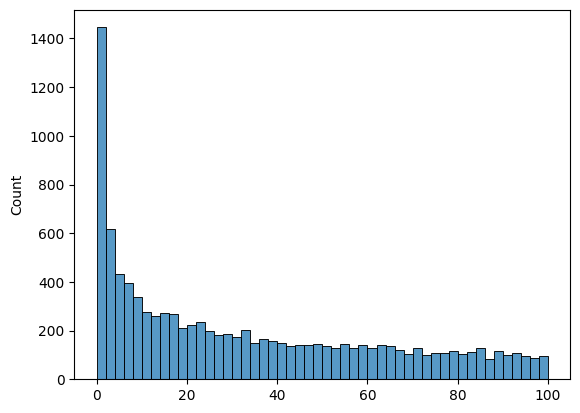

In [290]:
lesson_series_2 = np.round(np.random.random(size = 10000)**2 * 100, 2)
sns.histplot(lesson_series_2, bins = 50)

Here you can see that because the number of bins is the same as in the second graph above, but for more data, the histogram is a smoother graph.  Why does more data make for a smoother graph?  Something for you to think about.  I said it's because a larger number of data points in each bin reduces the role of chance - but why is that?

Here is a KDE (Kernel Density Estimate) plot.  It's just the same histogram, but drawn smoothly.  The KDE plot doesn't have a "number of bins."  It's always drawn the same way.  In this case, because of the smoothness of the curve, it seems that x-values less then zero and above 100 are still plotted, even though there were no such values in the dataset.  This seems like a drawback of the KDE plot, especially if the viewer is unprepared for this aspect of the plot.

<Axes: ylabel='Density'>

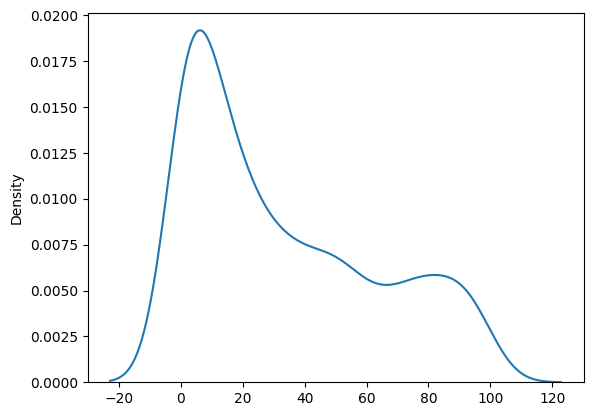

In [291]:
sns.kdeplot(lesson_series)

We could also draw a box plot.  This time, to construct the data I used a fourth power rather than squaring, with only 100 data points, so that the points are even more concentrated toward the small numbers.  It turns out that this will create a more interesting boxplot.  The top and bottom edges of the box are the 75th and 25th percentile, respectively, and the top and bottom "whiskers" show a larger range which is a multiple of 1.5 times the the box height.  (The bottom whisker cannot be see because it's pushed against the bottom of the graph.)  The filled-in box shows that half of the values are between about 0 and 30 on the y-axis.  Is that what you'd expect?  The 25th and 75th percentile of the original uniform random variable are at 0.25 and 0.75.  Taken to the fourth power and multiplied by 100 (remember, that's how we constructed our sample), that's 0.25\*\*4 * 100 = 0.4 and 0.75\*\*4 * 100 = 32.  It's plausible that those are the height of the bottom and top of the box.  We can see that a small number of samples are above the top whisker; they are shown as individual dots.

<Axes: >

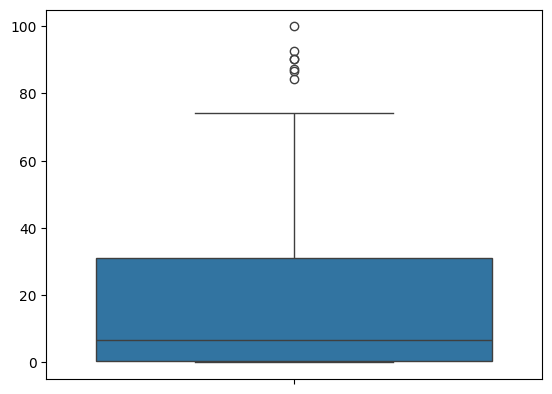

In [292]:
lesson_series_3 = np.round(np.random.random(size = 100)**4 * 100, 2)
sns.boxplot(lesson_series_3)

If we go back to the original lesson_series with the squared values, there will be two whiskers, because it isn't so strongly weighted toward small values:

<Axes: >

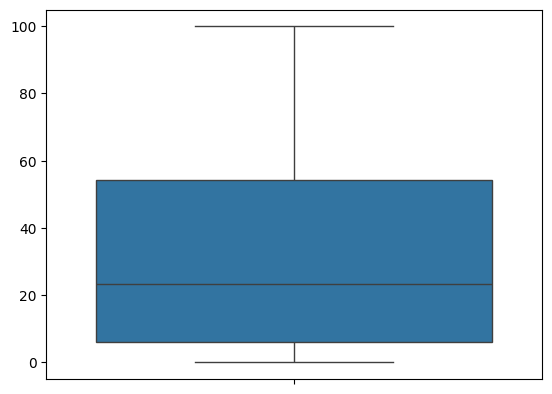

In [293]:
sns.boxplot(lesson_series)

Going back to the fourth power series, another histogram variant is the violin plot.  This simply combines a kde plot (turned on its side and forming two side of the violin) with a boxplot:

<Axes: >

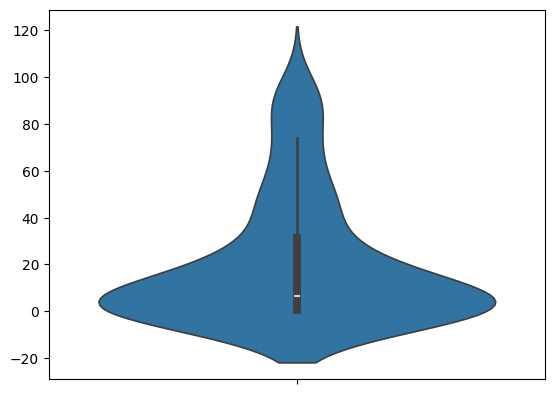

In [294]:
sns.violinplot(lesson_series_3)

Finally, a swarm plot shows the histogram (turned on its side and doubled, as with the violin plot) but showing each individual point.

<Axes: >

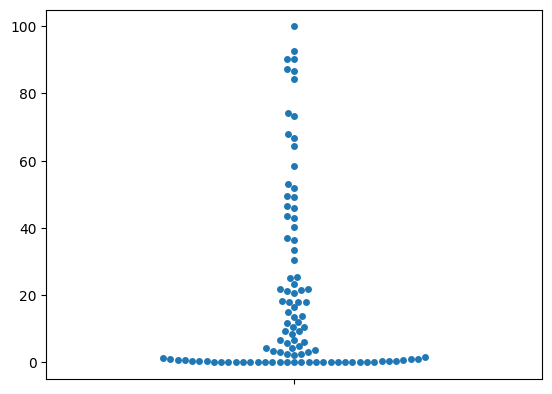

In [295]:
sns.swarmplot(lesson_series_3)

# 2. Weekly graph question

Below are a histogram and table representation of the same data.  A species of bird is being analyzed, and each individual's body length in inches has been measured.

Please write a short explanation of the pros and cons of these two representations.  Which would you choose?  How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [296]:
np.random.seed(0)
num_data = 10000
data = np.random.normal(size = num_data) + 6
df = pd.DataFrame(data.T, columns = ["data"])

In [297]:
histnums = np.histogram(df["data"])
histcounts = histnums[0]
histmins = histnums[1][0:-1]
histmaxes = histnums[1][1:]

In [298]:
pd.DataFrame(np.array([histcounts, histmins, histmaxes]).T, columns = ["count", "minval", "maxval"])

,count,minval,maxval
0,10.0,2.259899,3.014075
1,110.0,3.014075,3.768252
2,579.0,3.768252,4.522428
3,1710.0,4.522428,5.276604
4,2833.0,5.276604,6.030780
5,2688.0,6.030780,6.784956
6,1479.0,6.784956,7.539132
7,487.0,7.539132,8.293308
8,97.0,8.293308,9.047484
9,7.0,9.047484,9.801660


<Axes: ylabel='Frequency'>

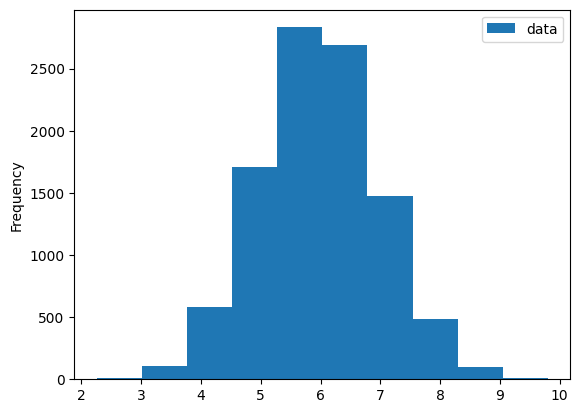

In [299]:
df.plot.hist()

<b>Answer:</b> Please write a short explanation of the pros and cons of these two representations.  Which would you choose?  How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

<b>Histogram vs. Table Representation</b>

<i>Table Representation - Pros & Cons: </i>
- Pro: Exact Values: Provides precise data points, essential for detailed analysis and statistical computations.
- Pro: Specific Binning: Each row corresponds to a specific range, offering a clear breakdown of data distribution.
- Con: Interpretation Difficulty: Raw numbers can be challenging to interpret quickly, making it hard to grasp overall trends.
- Con: Lack of Visual Appeal: Does not visually convey the shape or distribution of the data, which can be less engaging for the audience.

<i>Histogram Representation - Pros & Cons:</i>
- Pro: Visual Clarity: Effectively illustrates the distribution, making it easier to identify patterns, trends, and outliers.
- Pro: Immediate Insight: Facilitates quick understanding of data distribution without delving into numerical details.
- Pro: Automated Categorization: Data is grouped into bins, eliminating the need for manual categorization.
- Con: Approximate Values: Does not provide exact data points, which may be necessary for precise analyses.
- Con: Bin Sensitivity: The representation can be influenced by the number and width of bins, potentially leading to misinterpretation if not chosen appropriately. 


<i>.... Which to Chose?</i>

As with all data presentation choices, the choice between a table and a histogram depends on the audience and the objective (who, what, how).

For pattern recognition and distribution analysis, a histogram is preferable as it visually conveys the data's distribution, making it easier to identify trends and patterns.
For precise data retrieval and detailed analysis, a table is more suitable, providing exact values necessary for in-depth statistical work.
Given the context of analyzing bird body lengths, I believe a histogram would be the best approach for presenting the overall distribution to an audience, while a table could complement this by offering detailed data for further analysis.

<i>Suggested Formatting Enhancements for the Histogram:</i>
1. Title Addition: Incorporate a descriptive title such as "Distribution of Bird Body Lengths" to inform viewers about the content.
2. Axis Labeling:
    - X-axis: Label as "Body Length (inches)" to specify the measured variable.
    - Y-axis: Label as "Number of Birds" to indicate the frequency count.
3. Bin Optimization: Choose an appropriate number of bins to accurately reflect data distribution without overcomplicating the visual. 
4. Grid Lines: Add horizontal grid lines to enhance readability.
5. Color Scheme: Utilize a color palette that is pleasing to the eye and easy to read.

Making these changes will make the histogram more informative and engaging, effectively communicating the distribution characteristics of the bird body lengths.

Please see the hisogram below with some of the changes implemented.

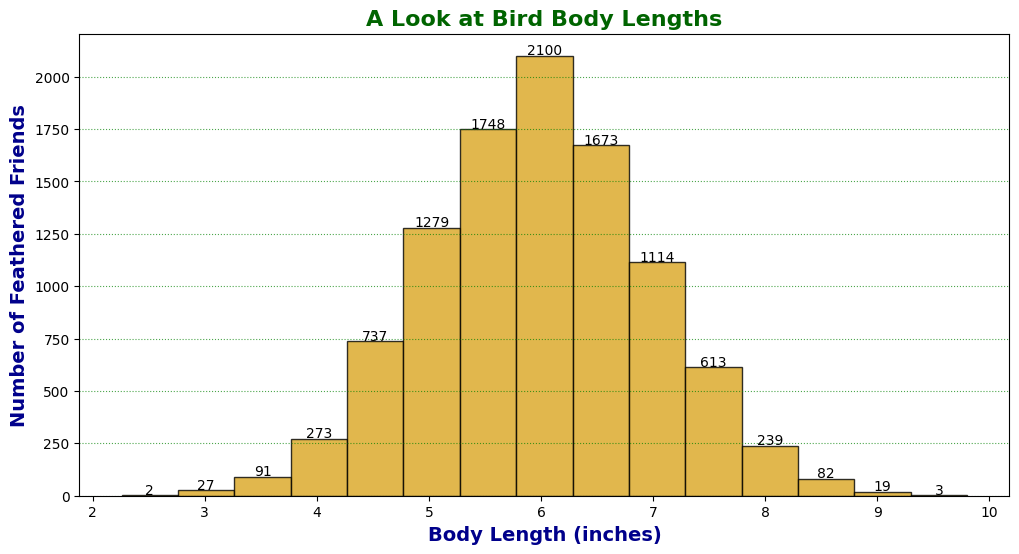

In [300]:
#generate sample data
np.random.seed(0)
num_data = 10000
data = np.random.normal(size=num_data) + 6  
df = pd.DataFrame(data, columns=["data"])

#create histogram+ improvements
plt.figure(figsize=(12, 6))  
n, bins, patches = plt.hist(df["data"], bins=15, color="goldenrod", edgecolor="black", alpha=0.8)

#add labels on top of bars, titles, axis label
for patch, value in zip(patches, n):
    plt.text(patch.get_x() + patch.get_width() / 2, value + 5, f"{int(value)}", 
             ha="center", fontsize=10, color="black")
plt.title("A Look at Bird Body Lengths", fontsize=16, color="darkgreen", fontweight="bold")
plt.xlabel("Body Length (inches)", fontsize=14, color="darkblue", fontweight="bold")
plt.ylabel("Number of Feathered Friends", fontsize=14, color="darkblue", fontweight="bold")

#add grid styling for improved readability
plt.grid(axis="y", linestyle="dotted", alpha=0.7, color="green")
plt.show()


# 3. Homework - Amusement Park Rides

Now let's imagine we have some data about how many times different visitors to an amusement park used each ride, as well as how much money they spend at the amusement park.  Each sample represents a single visit by a single visitor on a given date.

In [301]:
num_visits = 10000
np.random.seed(0)

In [302]:
df = pd.DataFrame(columns = ["VisitDate"])

In [303]:
start = datetime(2010, 1, 1)
end = datetime(2024, 1, 1)
numdays = (end - start).days
random_days = np.random.randint(0, numdays, size = num_visits)
s = start + pd.to_timedelta(random_days, unit='D')
s = s.sort_values()
df["VisitDate"] = s

In [304]:
df["IsAdult"] = np.random.choice([True, True, False], size = num_visits)

In [305]:
df["MartianRide"] = np.random.choice([0] * 8 + [1] * 3 + [2] * 3 + [3] * 1 + [10], size = num_visits) * df["IsAdult"]

In [306]:
df["TeacupRide"] = np.random.choice([0] * 2 + [1] * 5 + [2] * 3 + [5] * 2, size = num_visits) * ~df["IsAdult"]

In [307]:
df["RiverRide"] = np.random.choice([0] * 8 + [1] * 3 + [2] * 2, size = num_visits) * df["IsAdult"] + np.random.randint(1, 5, size = num_visits) * ~df["IsAdult"]

In [308]:
df["MoneySpent"] = np.round(np.random.random(size = num_visits)**2 * 100, 2)

In [309]:
df.iloc[0:5]

,VisitDate,IsAdult,MartianRide,TeacupRide,RiverRide,MoneySpent
0,2010-01-01,False,0,1,4,10.30
1,2010-01-01,True,3,0,0,38.77
2,2010-01-01,True,0,0,0,79.34
3,2010-01-01,True,0,0,1,87.84
4,2010-01-02,False,0,1,2,18.65


1. Find the mean, median, and mode for how many times visitors rode each ride.  See Week 1 for Google advice on this.

<b>Answer:</b> During Week1, the suggested Google search or ChatGPT prompt used was: "how can I find out the mean, median, and mode of a pandas Series"

A google search of the prompt resulted in these websites:
1. https://www.statology.org/pandas-mean-median-mode/
2. https://stackoverflow.com/questions/52603397/computing-mean-median-and-mode-in-python

Based on Stackoverflow, I leveraged Pandas built-in methods mean(), median(), mode(); see code below. 


In [310]:
#list out ride columns
ride_columns = ["MartianRide", "TeacupRide", "RiverRide"]

#calc statistics - mean, median, mode:
ride_stats = {
    "Mean": df[ride_columns].mean(),  
    "Median": df[ride_columns].median(),
    "Mode": df[ride_columns].mode().iloc[0] 
}

# Convert to df and print
ride_stats_df = pd.DataFrame(ride_stats)
print(ride_stats_df)

               Mean  Median  Mode
MartianRide  0.9073     0.0     0
TeacupRide   0.5862     0.0     0
RiverRide    1.2007     1.0     0


2. Use groupby() to find the mean, median, and mode for how many times each ride was ridden on each given day.

<b>Answer:</b> 2. Use groupby() to find the mean, median, and mode for how many times each ride was ridden on each given day.

I used https://stackoverflow.com/questions/40788530/how-to-calculate-mean-of-some-rows-for-each-given-date-in-a-dataframe as a reference to figure out how to use groupby() to find the mean, median, and mode for how many times each ride was ridden on each given day.



Suggested Google search or ChatGPT prompt: 
I first tried: "How do I use groupby to find the mean over each day in my DataFrame?" but Google didn't help me.

Then I tried: "How do I find the mean over each date in a dataframe?"  Sometimes, you have to try multiple searches.

This gives me a very helpful site, where someone is doing the same thing we are:

https://stackoverflow.com/questions/40788530/how-to-calculate-mean-of-some-rows-for-each-given-date-in-a-dataframe

In [311]:
#use groupby for VisitDate and calculate mean, median, and mode
ride_grouped_stats = df.groupby("VisitDate")[ride_columns].agg(
    {
        "MartianRide": ["mean", "median", lambda x: x.mode().iloc[0]],
        "TeacupRide": ["mean", "median", lambda x: x.mode().iloc[0]],
        "RiverRide": ["mean", "median", lambda x: x.mode().iloc[0]]
    }
)
print(ride_grouped_stats.head())

           MartianRide                   TeacupRide                    \
                  mean median <lambda_0>       mean median <lambda_0>   
VisitDate                                                               
2010-01-01        0.75    0.0          0       0.25    0.0          0   
2010-01-02        0.00    0.0          0       1.00    1.0          1   
2010-01-03        0.00    0.0          0       1.50    0.5          0   
2010-01-04        0.00    0.0          0       0.00    0.0          0   
2010-01-05        0.50    0.5          0       0.00    0.0          0   

           RiverRide                    
                mean median <lambda_0>  
VisitDate                               
2010-01-01      1.25    0.5          0  
2010-01-02      2.00    2.0          2  
2010-01-03      1.25    0.5          0  
2010-01-04      1.00    1.0          1  
2010-01-05      0.00    0.0          0  


3. Find the standard deviation and variance of the count for each ride.

Suggested Google search or ChatGPT prompt: "How do I find the standard deviation of a Series in pandas documentation?" and similar query for variance.

I included the word "documentation" because this task likely involves applying one single function for standard deviation and another for variance, so I expected that I could find a single documentation page for each that would cover my needs.  I get these:

https://pandas.pydata.org/pandas-docs/dev/reference/api/pandas.Series.var.html

https://pandas.pydata.org/docs/reference/api/pandas.Series.std.html

<b>Answer: </b> 3. Find the standard deviation and variance of the count for each ride.

I used https://pandas.pydata.org/docs/reference/api/pandas.Series.std.html. This documentation reflects how Pandas should be used to compute the standard deviation and variance for the count of each ride (i.e., use .std() and .var())

In [312]:
#calc standard deviation / variance
ride_stats = df[ride_columns].agg(["std", "var"])
print(ride_stats)


     MartianRide  TeacupRide  RiverRide
std     2.077339    1.232851   1.295757
var     4.315338    1.519922   1.678987


4. Find the 90th percentile count for each ride.  That is, if the customers are ordered by their number of rides, and there are 100 customers, how many rides does the 90th person take?  There is a function in pandas that easily does this calculation.

Suggested Google search or ChatGPT prompt: "How do I find a percentile value for a Series in pandas documentation?"

This time, I will let you find the page!  Hint: it's not actually called the "percentile" function.

<B>Answer:</b> 4. Find the 90th percentile count for each ride. That is, if the customers are ordered by their number of rides, and there are 100 customers, how many rides does the 90th person take?  There is a function in pandas that easily does this calculation.

I Googled "How do I find a percentile value for a Series in pandas documentation?" and Google the overview response stated "To find a percentile value for a Series in pandas, the quantile() method is used. This method calculates the value at the specified quantile (percentile).The quantile() method accepts a float between 0 and 1, representing the desired percentile. It can also accept a list or array of floats to calculate multiple percentiles at once. The interpolation method can be specified using the interpolation parameter, which defaults to 'linear'. Other options include 'lower', 'higher', 'nearest', and 'midpoint'."  

The Google search result tells me that I should be looking for other words, such as quantile, instead of percentile. This is further supported by the top websites that appeared in the google search:
1. pandas.Series.quantile: https://pandas.pydata.org/docs/reference/api/pandas.Series.quantile.html
2. How do I get the percentile for a row in a pandas dataframe?  https://stackoverflow.com/questions/50804120/how-do-i-get-the-percentile-for-a-row-in-a-pandas-dataframe
3. Pandas Percentile: Calculate Percentiles of a Dataframe: https://blog.enterprisedna.co/pandas-percentile-calculate-percentiles-of-a-dataframe/

Pandas .quantile(q=0.90) directly computes the 90th percentile of ride counts across all visitors.


In [313]:
#compute 90th percentile for each ride using Pandas `.quantile()`
ride_percentiles = df[ride_columns].quantile(q=0.90)
print(ride_percentiles)

MartianRide    2.0
TeacupRide     2.0
RiverRide      3.0
Name: 0.9, dtype: float64


5. Plot a histogram of the ride count, using each day as data element as you did in #2.  Use both the total ride count for each day as well as, separately, the mean ride count for each day.

Suggested Google search or ChatGPT prompt: "How do I plot a histogram for a Series in pandas?"

I found this: https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.hist.html

Note: the "by" keyword will not help you plot a count for each day; if you try to use it for this, it will try to draw a separate histogram for each day.

You've already learned how to find the mean ride count for each day.  Can you use a similar idea to find the total ride count for each day?

<b>Answer:</b> 5. Plot a histogram of the ride count, using each day as data element as you did in #2.  Use both the total ride count for each day as well as, separately, the mean ride count for each day.


Like #2, we will use groupby to calucluate  each data element: 

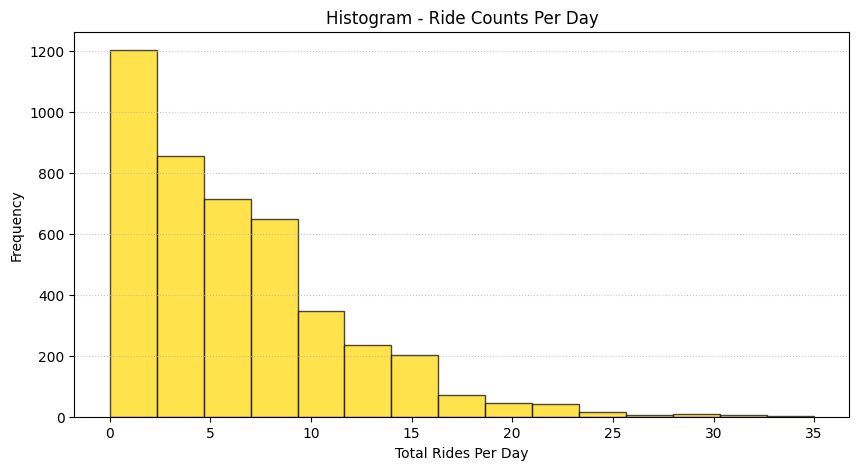

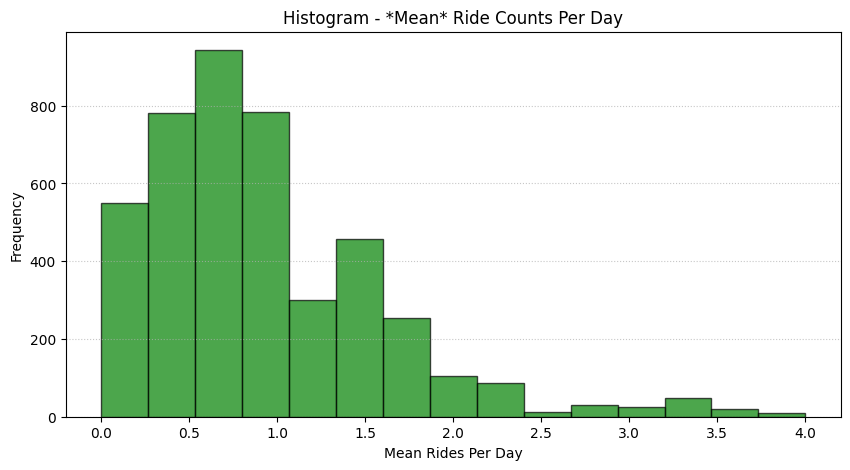

In [314]:
#calc total and mean ride count per day
daily_total_rides = df.groupby("VisitDate")[ride_columns].sum().sum(axis=1)  #sum across all rides per day
daily_mean_rides = df.groupby("VisitDate")[ride_columns].mean().mean(axis=1)  #mean across all rides per day

#plot histogram for total ride count per day
plt.figure(figsize=(10, 5))
daily_total_rides.plot.hist(bins=15, alpha=0.7, color="gold", edgecolor="black")
plt.title("Histogram - Ride Counts Per Day")
plt.xlabel("Total Rides Per Day")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="dotted", alpha=0.7)
plt.show()

#plot histogram for mean ride count per day
plt.figure(figsize=(10, 5))
daily_mean_rides.plot.hist(bins=15, alpha=0.7, color="green", edgecolor="black")
plt.title("Histogram - *Mean* Ride Counts Per Day")
plt.xlabel("Mean Rides Per Day")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="dotted", alpha=0.7)
plt.show()


6. Make a bar chart showing the total number of Adult and Child participants.

Try to formulate your own Google search or ChatGPT prompt.

Here's one page I found:

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html

which shows some interesting examples for you to use.  I recommend clicking on the first, basic example to see how to use the function.

You can also look up the pandas documentation, which might lead to an entirely different method.

<b>Answer: </b> 6. Make a bar chart showing the total number of Adult and Child participants.

The professor provided matplotlib.pyplot.bar: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html

I Googled "how to create a bar chart in python using pandas", which took me to the following links:
1. pandas.DataFrame.plot.bar https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
2. Python | Pandas Dataframe.plot.bar: https://www.geeksforgeeks.org/python-pandas-dataframe-plot-bar/

I created the bar chart showing the total number of Adult / Child participant, using Pandas .plot(kind="bar", stacked=True) method as noted in links above.


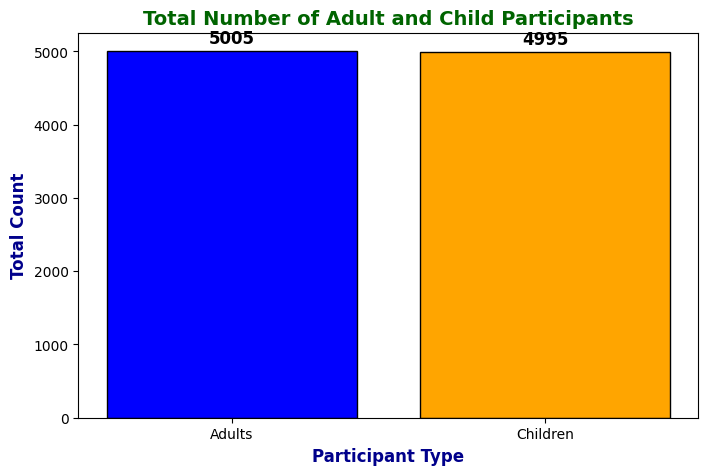

In [315]:
#create IsAdult column -- true for adults, false for children
df = pd.DataFrame({
    "IsAdult": np.random.choice([True, False], size=num_visits)
})

#count # adult / child participants
participant_counts = df["IsAdult"].value_counts()

#create bar chart, title, labels, etc. 
plt.figure(figsize=(8, 5))
plt.bar(["Adults", "Children"], participant_counts, color=["blue", "orange"], edgecolor="black")
plt.xlabel("Participant Type", fontsize=12, fontweight="bold", color="darkblue")
plt.ylabel("Total Count", fontsize=12, fontweight="bold", color="darkblue")
plt.title("Total Number of Adult and Child Participants", fontsize=14, fontweight="bold", color="darkgreen")
for i, count in enumerate(participant_counts):
    plt.text(i, count + 100, str(count), ha="center", fontsize=12, fontweight="bold", color="black")
plt.show()


7. Make a stacked bar chart showing how many Adult and Child visits took the River Ride, with the x-axis showing the number of rides and with two stacked bars (adult, child).  That is, there could be a column for the number of Adults (and Children) who took 0 rides, 1 ride, 2 rides, and so on.

Try to formulate your own Google search or ChatGPT prompt.

For me, the pandas documentation was easier than the matplotlib documentation.

* If you use the pandas method, you might have to one-hot encode the IsAdult column.  You might want names for the new columns other than True and False.  Use df.join or pd.concat to attach the pd.get_dummies table you've created, and then groupby the RiverRide value.

* You will need to end up with a small table with two columns (IsAdult True and False) and an index (RiverRide) as well as a small number of rows (the values of RiverRide)

* That said, if you can come up with another approach, it's fine.

<b>Answer:</B> 7. Make a stacked bar chart showing how many Adult and Child visits took the River Ride, with the x-axis showing the number of rides and with two stacked bars (adult, child).  That is, there could be a column for the number of Adults (and Children) who took 0 rides, 1 ride, 2 rides, and so on.

I Googled "how to create a stacked bar chart using pandas" and came up with the following resources:
1. How to Create a Stacked Bar Chart in Pandas: https://www.statology.org/pandas-stacked-bar-chart/
2. Plotting Categorical Variable with Stacked Bar Plot: https://www.geeksforgeeks.org/plotting-categorical-variable-with-stacked-bar-plot/
3. Create a stacked bar plot in Matplotlib: https://www.geeksforgeeks.org/create-a-stacked-bar-plot-in-matplotlib/

I used the pandas method and the following approaches:
- One-Hot Encoding (pd.get_dummies)
-- Converts IsAdult (True/False) into two separate columns:
Adults = True; Children = False
- Grouping Data with groupby()
-- Groups the dataset by the # of times a participant rode the River Ride. Gets total count of Adults and Children for each ride count.
- Using Pandas' .plot() Method




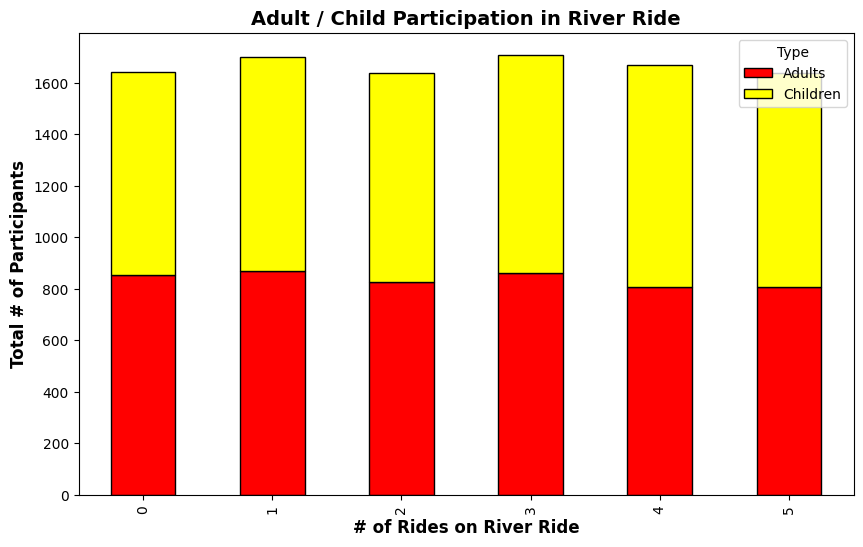

In [316]:
#creates IsAdult column. True = Adults. False = Children
df = pd.DataFrame({
    "IsAdult": np.random.choice([True, False], size=num_visits)
})

#onehot encode IsAdult column to create separate columns for adults vs children
df_encoded = df.join(pd.get_dummies(df["IsAdult"], prefix="Participant"))

#reamned colunns to avoid confusion
df_encoded = df_encoded.rename(columns={"Participant_True": "Adults", "Participant_False": "Children"})

#setting upRiverRide column with random ride counts - assuming 0 to 5 rides
df_encoded["RiverRide"] = np.random.choice([0, 1, 2, 3, 4, 5], size=num_visits)

#group by the RiverRide count, total number of adults / children
river_ride_grouped = df_encoded.groupby("RiverRide")[["Adults", "Children"]].sum()

#ceate stacked bar chart, add labels, title, legend
plt.figure(figsize=(10, 6))
river_ride_grouped.plot(kind="bar", stacked=True, color=["red", "yellow"], edgecolor="black", ax=plt.gca())
plt.xlabel("# of Rides on River Ride", fontsize=12, fontweight="bold")
plt.ylabel("Total # of Participants", fontsize=12, fontweight="bold")
plt.title("Adult / Child Participation in River Ride", fontsize=14, fontweight="bold")
plt.legend(title="Type", labels=["Adults", "Children"], loc="upper right")
plt.show()


8. Other tasks

Use seaborn (import seaborn as sns) to create a kernel density estimation (kde) plot.  (You can choose any aspect of the amusement park dataset to plot.)  Here is a tutorial you can read about seaborn:

https://seaborn.pydata.org/tutorial/introduction.html

Seaborn often makes nicer looking graphs than pandas or matplotlib.

Now use seaborn to make a swarm plot, a violin plot, and a box plot.

Which plots are the best for showing this data?

<b>Answer:</b> 8. Other tasks

1. Created KDE plot usnig the amusement park dataset.
2. Used seaborn to make a swarm plot.
3. Used seaborn to make a violin plot.
4. Used seaborn to make a box plot.

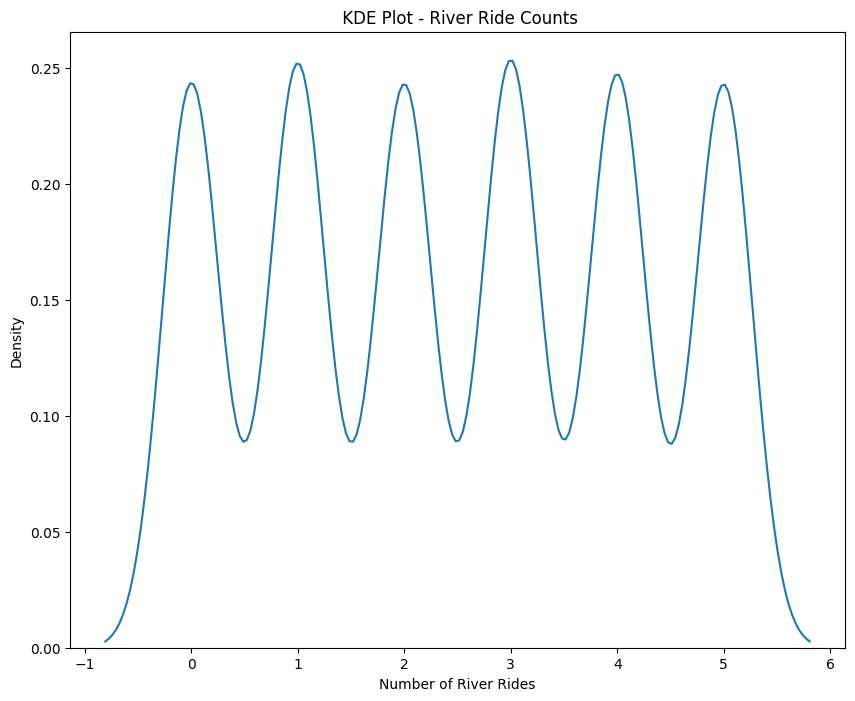

In [317]:
## 1 - KDE 
#KDE plot for river ride
plt.figure(figsize=(10, 8))
sns.kdeplot(df_encoded["RiverRide"]) 
plt.xlabel("Number of River Rides")
plt.ylabel("Density")
plt.title(" KDE Plot - River Ride Counts")
plt.show()


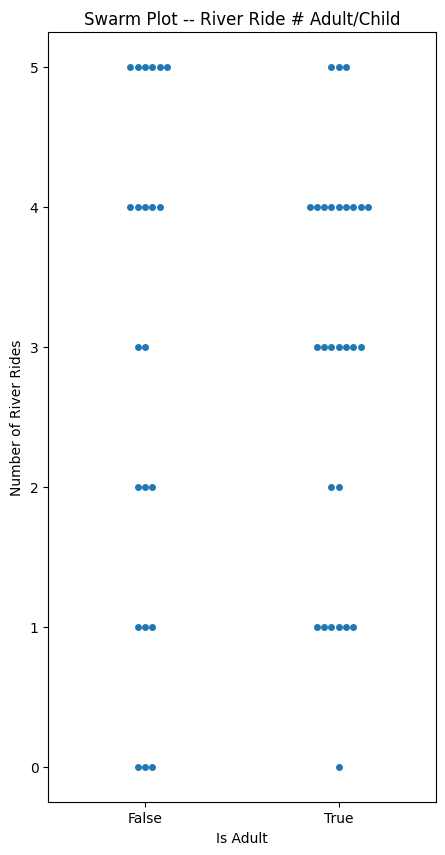

In [318]:
## 2. Used seaborn to make a swarm plot.
#decreased size -- had computer issues 
df_sample = df_encoded.sample(n=50, random_state=42)

#create swarm plot, labels, titlke
plt.figure(figsize=(5, 10))
sns.swarmplot(x=df_sample["IsAdult"], y=df_sample["RiverRide"])
plt.xlabel("Is Adult")
plt.ylabel("Number of River Rides")
plt.title("Swarm Plot -- River Ride # Adult/Child")
plt.show()


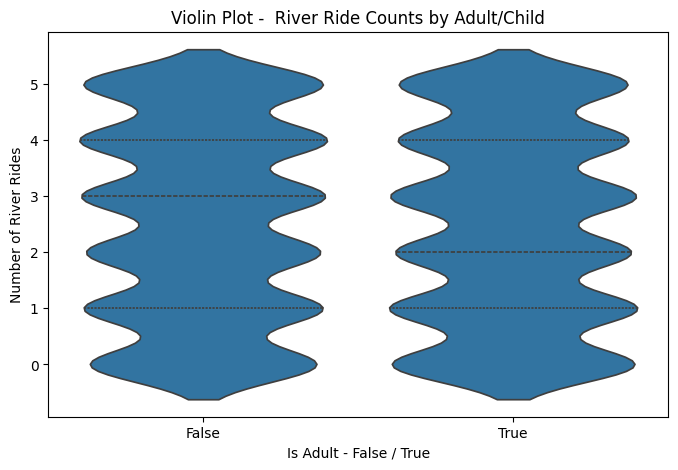

In [319]:
# 3. Used seaborn to make a violin plot.
#create violin plot, title, label
plt.figure(figsize=(8, 5))
sns.violinplot(x=df_encoded["IsAdult"], y=df_encoded["RiverRide"], inner="quartile")
plt.xlabel("Is Adult - False / True")
plt.ylabel("Number of River Rides")
plt.title("Violin Plot -  River Ride Counts by Adult/Child")
plt.show()


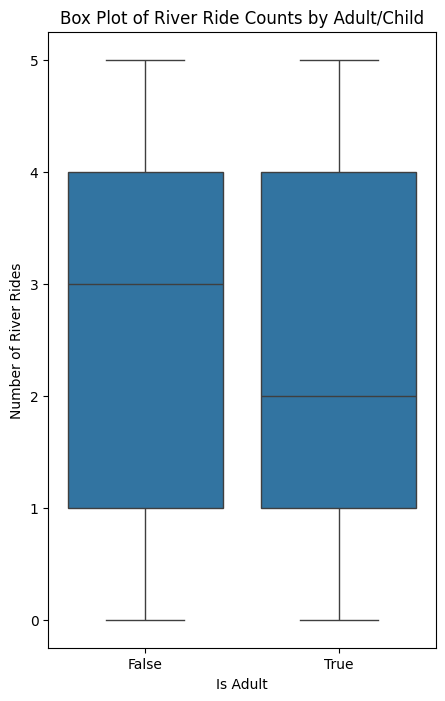

In [320]:
# 4. Used seaborn to make a box plot.
#create box plot - riverRide grouped by IsAdult. labels and title
plt.figure(figsize=(5, 8))
sns.boxplot(x=df_encoded["IsAdult"], y=df_encoded["RiverRide"])
plt.xlabel("Is Adult")
plt.ylabel("Number of River Rides")
plt.title("Box Plot of River Ride Counts by Adult/Child")
plt.show()


# 4. Storytelling With Data graph

Try to make a scatterplot using amusement park dataset that is similar to the one on page 45, where the two axes are the Teacup Ride count and the River Ride count.  If you want to see individual dots and not a dense swarm of dots, you'll have to cut the dataset down to a small number of points (say, 100 points or so).  You can remove the other points, for instance, and focus on the first 100 points.

Here are some things you could do (you don't have to do all of them):

* Draw a dashed line that roughly separates the adult from child points.

* Draw the points in the adult vs. child region of the graph in different colors.

* Choose the right size and number of dots to make the graph look good.

* Write a word that appears on the dashed line (like AVG in the plot on page 45).

If there are any other graphs in the Storytelling With Data chapter that look interesting, and you want more practice, you can try to reproduce them too.

<b>Answer</b> Storytelling With Data graph - create a scatter plot using amusement park dataset that is similar to the one on page 4

Please see the image from page 45: 

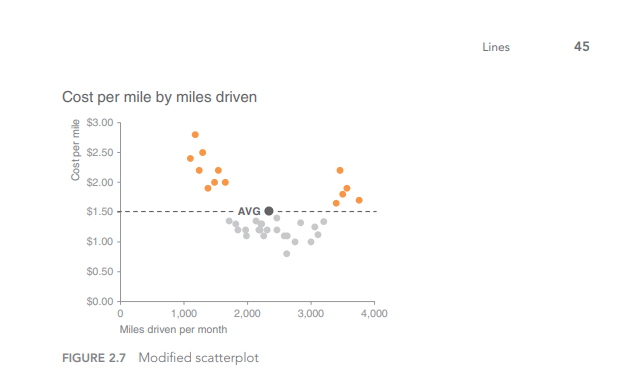

In [321]:
#I had to reload the data because elements were missing -- probably when I one-hot coded or made some other change. 
#create df with VisitDate column
df = pd.DataFrame(columns=["VisitDate"])

#create random visit dates
start = datetime(2010, 1, 1)
end = datetime(2024, 1, 1)
numdays = (end - start).days
random_days = np.random.randint(0, numdays, size=num_visits)
df["VisitDate"] = start + pd.to_timedelta(random_days, unit="D")

#sort by VisitDate
df = df.sort_values(by="VisitDate")

#create IsAdulrt column
df["IsAdult"] = np.random.choice([True, False], size=num_visits)

#create ride counts
df["MartianRide"] = np.random.choice([0] * 8 + [1] * 3 + [2] * 3 + [3] * 1 + [10], size=num_visits) * df["IsAdult"]
df["TeacupRide"] = np.random.choice([0] * 2 + [1] * 5 + [2] * 3 + [5] * 2, size=num_visits) * ~df["IsAdult"]
df["RiverRide"] = np.random.choice([0] * 8 + [1] * 3 + [2] * 2, size=num_visits) * df["IsAdult"] + np.random.randint(1, 5, size=num_visits) * ~df["IsAdult"]

#create MoneySpent column
df["MoneySpent"] = np.round(np.random.rand(num_visits) ** 2 * 100, 2)

#display first few rows
print(df.head())

      VisitDate  IsAdult  MartianRide  TeacupRide  RiverRide  MoneySpent
258  2010-01-01     True            3           0          1       39.02
2795 2010-01-01    False            0           1          2       63.78
1354 2010-01-01     True            3           0          0        0.76
8640 2010-01-02    False            0           1          3       82.35
7772 2010-01-03     True            2           0          2       57.03


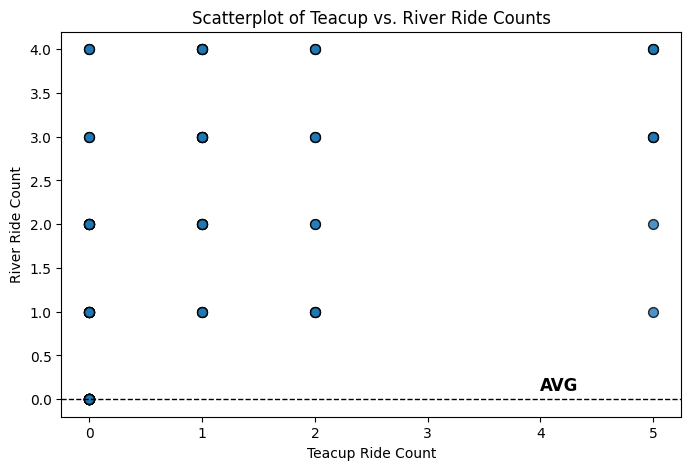

In [322]:
#confirm "TeacupRide" and "RiverRide" exist in df_encoded
if "TeacupRide" in df.columns and "RiverRide" in df.columns:
    #decrease dataset to first 100 points for clarity
    df_sample = df.iloc[:100]  # Use df instead of df_encoded

    #create a basic scatterplot
    plt.figure(figsize=(8, 5))
    plt.scatter(df_sample["TeacupRide"], df_sample["RiverRide"], edgecolors="black", s=50, alpha=0.8)

    #add dashed line to indicate the median Teacup Ride count. add label, title, etc
    median_teacup = df_sample["TeacupRide"].median()
    plt.axhline(median_teacup, linestyle="dashed", color="black", linewidth=1)
    plt.text(df_sample["TeacupRide"].max() - 1, median_teacup + 0.1, "AVG",
             fontsize=12, fontweight="bold", color="black")
    plt.xlabel("Teacup Ride Count")
    plt.ylabel("River Ride Count")
    plt.title("Scatterplot of Teacup vs. River Ride Counts")
    plt.show()


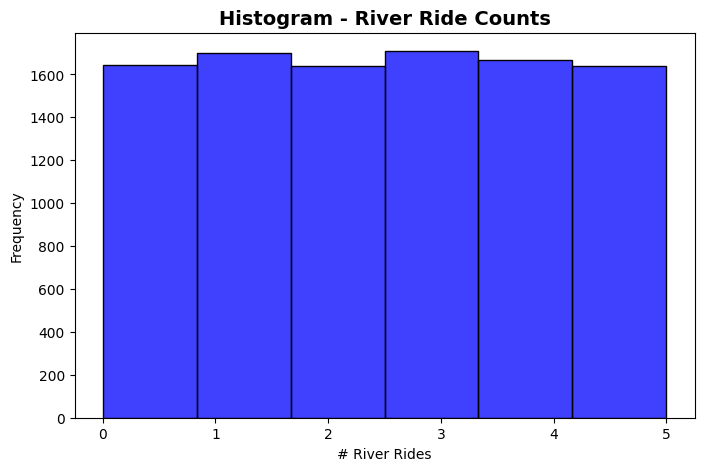

In [323]:

##other graph example
# create histogram. add labels, title, size, etc 
plt.figure(figsize=(8, 5))
sns.histplot(df_encoded["RiverRide"], bins=6, color="blue", kde=False, edgecolor="black")
plt.xlabel("# River Rides")
plt.ylabel("Frequency")
plt.title("Histogram - River Ride Counts", fontsize=14, fontweight="bold")
plt.show()